In [6]:
cd('../src/');

# Load the pointCloud

In [7]:
ptCloud = pcread('../Data/ptCloudOriginal.ply');

# Display point cloud

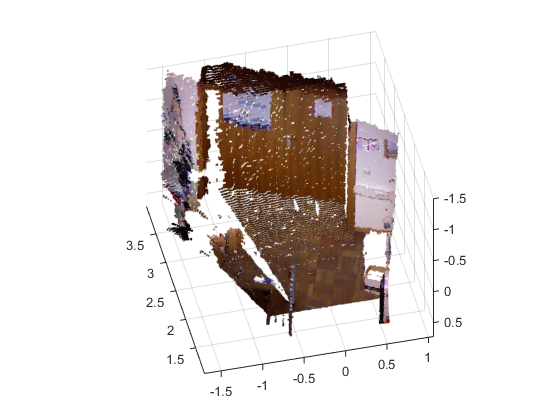

In [8]:
pcshow(ptCloud, 'VerticalAxis', 'y', 'VerticalAxisDir', 'down')

# Filter cross section

Filter between -0.2 m to 0.2 m

In [9]:
ptCloudNew = GetCrossProfile(ptCloud, -0.2, 0.2)


ptCloudNew = 

  pointCloud with properties:

    Location: [45327×3 single]
       Color: [45327×3 uint8]
      Normal: []
       Count: 45327
     XLimits: [-1.6754 1.0566]
     YLimits: [-0.2000 0.2000]
     ZLimits: [1.0400 3.9750]




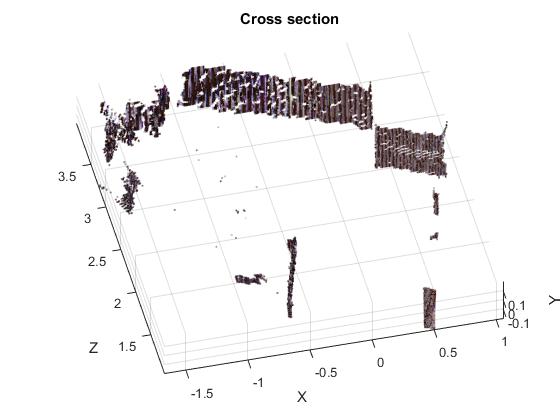

In [10]:
pcshow(ptCloudNew, 'VerticalAxis', 'Y') % , 'VerticalAxisDir', 'down')
title('Cross section')
xlabel('X');
ylabel('Y');
zlabel('Z');

# Flatten cross section

In [11]:
ptCloudFlattend = FlattenPointCloud(ptCloudNew)


ptCloudFlattend = 

  pointCloud with properties:

    Location: [3632×3 single]
       Color: [3632×3 uint8]
      Normal: []
       Count: 3632
     XLimits: [-1.6754 1.0566]
     YLimits: [0 0]
     ZLimits: [1.0400 3.9750]




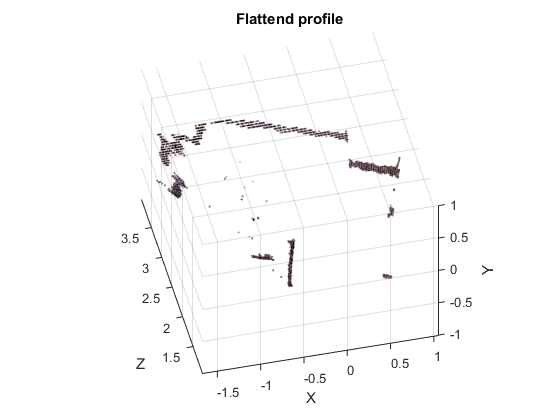

In [12]:
pcshow(ptCloudFlattend, 'VerticalAxis', 'Y')
title('Flattend profile')
xlabel('X')
ylabel('Y')
zlabel('Z')

### Alternative visualization

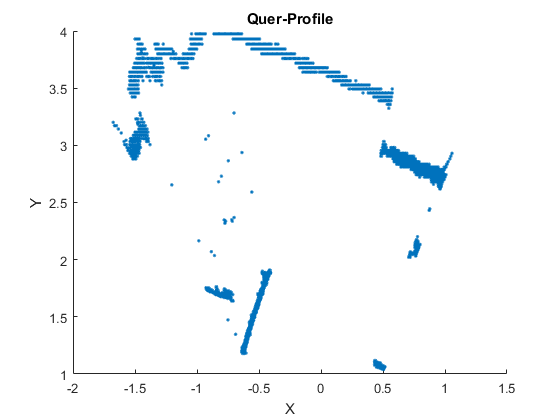

In [13]:
scatter(ptCloudFlattend.Location(:, 1), ptCloudFlattend.Location(:, 3), '.')
title('Quer-Profile')
xlabel('X')
ylabel('Y')

## Save Data

In [20]:
pcwrite(ptCloudFlattend, '../Data/ptCloudFlattend.ply');

In [21]:
class(ptCloudFlattend.Location)


ans =

single




In [22]:
map = [ ptCloudFlattend.Location(:, 1), ptCloudFlattend.Location(:, 3) ];
size(map)


ans =

        3632           2




### Get Grid dimensions

In [23]:
xMin = min(map(:, 1))
xMax = max(map(:, 1))
yMin = min(map(:, 2))
yMax = max(map(:, 2))

width  = abs(abs(xMax) - abs(xMin))
height = abs(abs(yMax) - abs(yMin))


xMin =

  single

   -1.6754


xMax =

  single

    1.0566


yMin =

  single

    1.0400


yMax =

  single

    3.9750


width =

  single

    0.6188


height =

  single

    2.9350




In [26]:
bog = robotics.BinaryOccupancyGrid(abs(abs(xMax) - abs(xMin)), abs(abs(yMax) - abs(yMin)))

> In coder.internal.warning (line 8)
  In robotics.BinaryOccupancyGrid (line 118)

bog = 

  BinaryOccupancyGrid with properties:

               GridSize: [3 1]
             Resolution: 1
           XWorldLimits: [0 1]
           YWorldLimits: [0 3]
    GridLocationInWorld: [0 0]




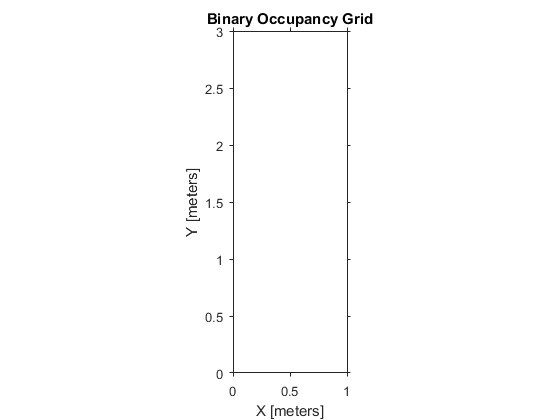

In [27]:
show(bog)

In [28]:
world2grid(bog,map(1,:))


  File C:\Program Files\MATLAB\R2016b\toolbox\robotics\robotalgs\+robotics\+algs\+internal\OccupancyGridBase.m, line 137, in OccupancyGridBase.validatePosition

  File C:\Program Files\MATLAB\R2016b\toolbox\robotics\robotalgs\+robotics\BinaryOccupancyGrid.m, line 287, in BinaryOccupancyGrid.world2grid
Coordinate position outside world dimensions. The minimum and maximum world limits are [0.00 1.00] in X direction and [0.00 3.00] in Y direction.

